In [4]:
# Import the necessary libraries
import ezc3d
import numpy as np
import matplotlib.pyplot as plt


In [7]:

# Load a C3D file
c3d_file_path = 'gait-pig.c3d'  # Replace with your .c3d file path
c3d = ezc3d.c3d(c3d_file_path)


# How to access specific marker data or joint angle from the loaded file

In [34]:
# Extract labels and corresponding data from a c3d file (likely motion capture data)

# Get a list of all point parameters
points=list(c3d['parameters']['POINT'].keys())

# Find indices of point parameters that contain the word 'LABELS'
LABELS=np.where(np.char.find(points,'LABELS')==0)[0]

# Extract the first set of labels
label=np.array(c3d['parameters']['POINT'][points[LABELS[0]]]['value'])

# If there are multiple sets of labels, append them to the 'label' array
if LABELS.shape[0]>1:
    for LABEL in range(1,LABELS.shape[0]):
        label=np.append(label,
                        np.array(c3d['parameters']['POINT'][points[LABELS[LABEL]]]['value']))

# Extract the 3D point data for each label
label_data=c3d['data']['points'][0:3,:,:]

# Create a dictionary to store the label and corresponding data
data={}
for i in range(len(label)):
    data[f"{label[i]}"]=label_data[:,i,:]

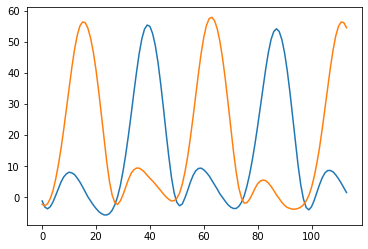

In [4]:

# Plot the right knee angles over time.
plt.plot(data['A22:RKneeAngles'][0,:]) 
# Plot the left knee angles over time.
plt.plot(data['A22:LKneeAngles'][0,:]) 


# How to access events stored in c3d file

In [5]:
# Initialize a dictionary to store events for left and right limbs
events={'Right':{'Foot Strike':[],'Foot Off':[]},'Left':{'Foot Strike':[],'Foot Off':[]}}

# Extract context, event names, and timestamps from the c3d data
contexts=np.array(c3d['parameters']['EVENT']['CONTEXTS']['value'])  # Limb (Right/Left)
eventname=np.array(c3d['parameters']['EVENT']['LABELS']['value'])   # Event type (Foot Strike/Foot Off)
# Calculate event times in seconds, adjusting for trial start time and camera rate
values=np.array(c3d['parameters']['EVENT']['TIMES']['value'][1]*c3d['parameters']['TRIAL']['CAMERA_RATE']['value'])

# Populate the events dictionary
for i in range(len(contexts)):
    # Subtract trial start time to get relative time from trial start
    events[contexts[i]][eventname[i]].append(round(values[i]-c3d['parameters']['TRIAL']['ACTUAL_START_FIELD']['value'][0])) 

# Sort events for each limb and event type
for j in events.keys():
    for i in events[j].keys():
        events[j][i]=np.sort(events[j][i])

In [6]:
events

{'Right': {'Foot Strike': array([51, 99]), 'Foot Off': array([ 80, 129])},
 'Left': {'Foot Strike': array([ 27,  75, 123]),
  'Foot Off': array([ 57, 105])}}

# How to access C3D file using kineticstoolkit

In [24]:
import kineticstoolkit.lab as ktk

In [25]:
c3d_contents = ktk.read_c3d('sample data 1.c3d')

In [26]:
plt.plot(c3d_contents['Points'].data['RKneeAngles'][:,0]*1000)

In [6]:
# Set an interactive backend
%matplotlib qt5

In [28]:
markers = ktk.read_c3d('gait-pig.c3d')["Points"]

In [29]:
p = ktk.Player(markers)

In [23]:
p.play()

In [30]:
filename = ktk.doc.download("kinematics_tennis_serve_2players.c3d")
markers = ktk.read_c3d(filename)["Points"]

In [31]:
p = ktk.Player(markers)

In [ ]:
p.play()

# How to access C3D file using Pyomeca

In [8]:

import pyomeca #import pyomeca library
from pyomeca import Markers #import Markers class from pyomeca library

data_path = "gait-pig.c3d" #specify the data path
markers = Markers.from_c3d(data_path,prefix_delimiter=':') #load markers data from c3d file and set prefix delimiter to ":"
#The prefix_delimiter argument is used to specify the character that separates the prefix from the marker name in the C3D file. 
#This is useful when the marker names in the C3D file contain prefixes, such as "Left" or "Right". 
#By setting the prefix_delimiter, Pyomeca can correctly parse the marker names and extract the relevant data.


In [9]:
markers.channel

<xarray.DataArray 'channel' (channel: 77)> Size: 6kB
array(['RKNE', 'LKNE', 'RTIB', 'LTHI', 'RTHI', 'LTIB', 'LTOE', 'RANK', 'LANK',
       'RASI', 'LASI', 'RTOE', 'SACR', 'LHipAngles', 'LKneeAngles',
       'LAnkleAngles', 'RHipAngles', 'RKneeAngles', 'RAnkleAngles',
       'LPelvisAngles', 'RPelvisAngles', 'LFootProgressAngles',
       'RFootProgressAngles', 'LHipPower', 'LKneePower', 'LAnklePower',
       'RHipPower', 'RKneePower', 'RAnklePower', 'LAnkleMoment', 'LAnkleForce',
       'RAnkleMoment', 'RAnkleForce', 'RKneeMoment', 'RKneeForce',
       'LKneeMoment', 'LKneeForce', 'RHipMoment', 'RHipForce', 'LHipMoment',
       'LHipForce', 'PELO', 'PELP', 'PELA', 'PELL', 'LFEO', 'LFEP', 'LFEA',
       'LFEL', 'LTIO', 'LTIP', 'LTIA', 'LTIL', 'LFOO', 'LFOP', 'LFOA', 'LFOL',
       'LTOO', 'LTOP', 'LTOA', 'LTOL', 'RFEO', 'RFEP', 'RFEA', 'RFEL', 'RTIO',
       'RTIP', 'RTIA', 'RTIL', 'RFOO', 'RFOP', 'RFOA', 'RFOL', 'RTOO', 'RTOP',
       'RTOA', 'RTOL'], dtype='<U19')
Coordinates:
  * channel  (channel) <U19 6kB 'RKNE' 'LKNE' 'RTIB' ... 'RTOP' 'RTOA' 'RTOL'

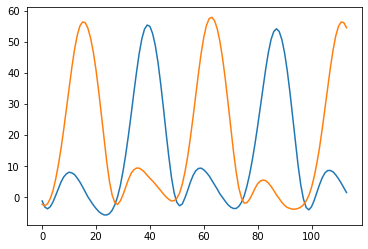

In [32]:
# Select data for the right knee angle and plot it.
plt.plot(markers.sel(axis='x',channel='RKneeAngles'))  
# .sel is used to select data based on coordinate values. In this case, it selects data for the channel labeled 'RKneeAngles'.

# Select data for the left knee angle and plot it.
plt.plot(markers.sel(axis='x',channel='LKneeAngles')) 
# Similar to above, this selects data for the channel labeled 'LKneeAngles'.

# The axis='x' extracts the flexion angles of the data for the selected channel

# How to procces EMG data using Pyomeca

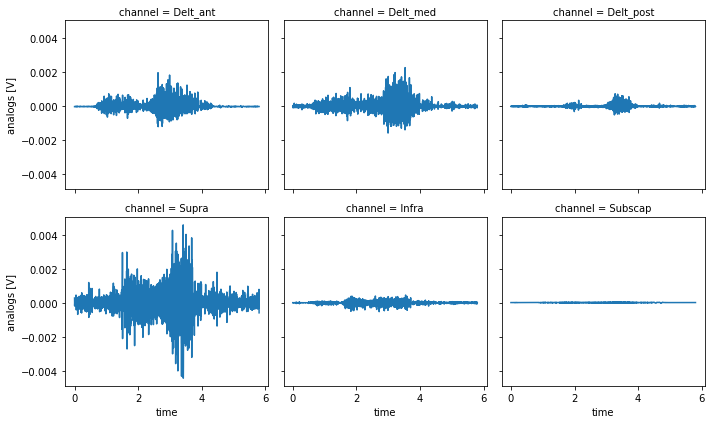

In [10]:
from pyomeca import Analogs # import Analogs class from pyomeca library

# path to c3d file containing emg data
data_path = "markers_analogs.c3d"

# list of muscles to extract from c3d file
muscles = [
    "Delt_ant",
    "Delt_med",
    "Delt_post",
    "Supra",
    "Infra",
    "Subscap",
] 

# create Analogs object from c3d file
emg = Analogs.from_c3d(data_path, suffix_delimiter=".", usecols=muscles) 

# plot emg data
emg.plot(x="time", col="channel", col_wrap=3) 


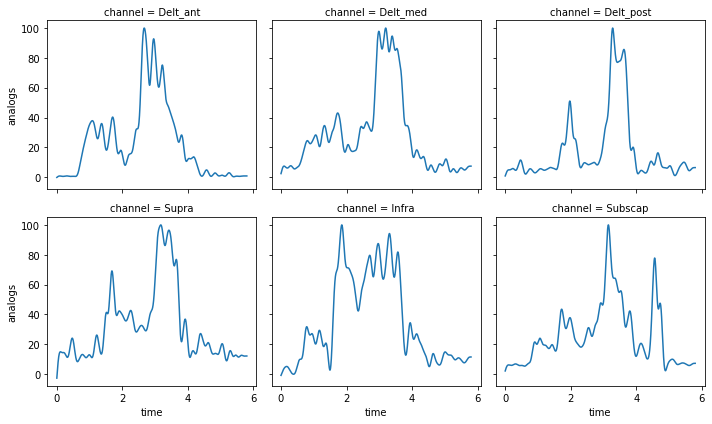

In [11]:
# Process EMG signal
emg_processed = (
    emg
    .meca.band_pass(order=2, cutoff=[10, 425])  # Apply band-pass filter to remove noise and focus on relevant frequencies
    .meca.center()  # Center the signal around zero
    .meca.abs()  # Take the absolute value to rectify the signal
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)  # Apply low-pass filter to smooth the signal
    .meca.normalize()  # Normalize the signal to a common range
)

# Plot processed EMG signal
emg_processed.plot(x="time", col="channel", col_wrap=3)

# - .meca commands are part of a library that provides signal processing functionalities.
# - .meca.band_pass: Applies a band-pass filter to the signal.
# - .meca.center: Centers the signal around zero.
# - .meca.abs: Calculates the absolute value of the signal.
# - .meca.low_pass: Applies a low-pass filter to the signal.
# - .meca.normalize: Normalizes the signal to a common range.

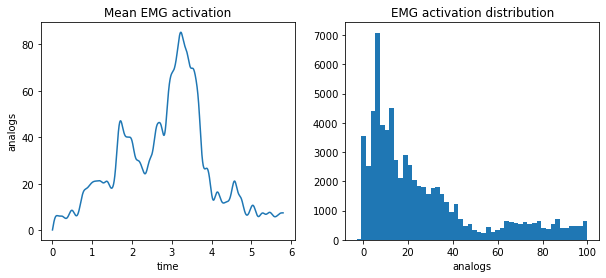

In [12]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

# Plot the mean EMG activation over all channels
emg_processed.mean("channel").plot(ax=axes[0])
axes[0].set_title("Mean EMG activation")

# Plot the histogram of EMG activation values
emg_processed.plot.hist(ax=axes[1], bins=50)
axes[1].set_title("EMG activation distribution")

# Display the plot
plt.show()

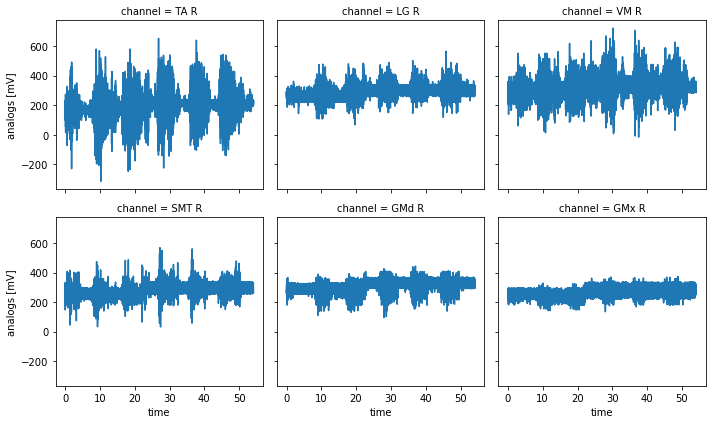

In [13]:
from pyomeca import Analogs

# Path to the C3D file containing EMG data
data_path = "vicon512.c3d"

# List of muscles to extract EMG data for
muscles = [
    "TA R",
    "LG R",
    "VM R",
    "SMT R",
    "GMd R",
    "GMx R",
]

# Extract EMG data from the C3D file
emg = Analogs.from_c3d(data_path, usecols=muscles)

# Plot the EMG data
# x="time" specifies that the x-axis should be time
# col="channel" specifies that each muscle should be plotted in a separate column
# col_wrap=3 specifies that the columns should be wrapped after 3 plots
emg.plot(x="time", col="channel", col_wrap=3)
